In [2]:
import pandas as pd

# Load the uploaded dataset
file_path = 'data/final_dataset_with_normal.csv'
df = pd.read_csv(file_path)

from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

model = SentenceTransformer('all-MiniLM-L6-v2')
X_embeddings = model.encode(df['text'].tolist(), show_progress_bar=True)

X_train, X_test, y_train, y_test = train_test_split(X_embeddings, df['label'], test_size=0.2, random_state=42, stratify=df['label'])

clf = LogisticRegression(max_iter=1000, class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

X, y = df['text'], df['label']

# 2) Stratified train-test split
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# 3) Linear SVM pipeline
svm_pipe = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=20_000, ngram_range=(1,2))),
    ('clf', LinearSVC(class_weight='balanced'))
])
svm_pipe.fit(X_tr, y_tr)
print("\n=== Linear SVM ===")
print(classification_report(y_te, svm_pipe.predict(X_te)))

# 4) Random-Forest pipeline
rf_pipe = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=20_000, ngram_range=(1,2))),
    ('clf', RandomForestClassifier(
        n_estimators=300,
        n_jobs=-1,
        class_weight='balanced_subsample',
        random_state=42))
])
rf_pipe.fit(X_tr, y_tr)

print("\n=== Random Forest ===")
print(classification_report(y_te, rf_pipe.predict(X_te)))



/opt/miniconda3/envs/cb/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Batches:   5%|▌         | 6/116 [00:31<09:34,  5.22s/it]


KeyboardInterrupt: 

In [3]:
train_path = 'data/train.csv'
test_path = 'data/test.csv'
output_path = 'data/defamation_traintest.csv'
DEFAMATION_LABEL = 2

# --- Main Script ---
print("🔹 Starting dataset creation process...")

    # 1. Load the datasets into pandas DataFrames
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
print(f"✔️ Loaded {len(train_df)} rows from train.csv and {len(test_df)} rows from test.csv.")

# 2. Combine the training and testing data into a single DataFrame
combined_df = pd.concat([train_df, test_df], ignore_index=True)
print(f"✔️ Combined datasets. Total rows: {len(combined_df)}")

# 3. Filter the DataFrame to keep only rows where the 'label' is 2 (Defamation)
defamation_df = combined_df[combined_df['label'] == DEFAMATION_LABEL].copy()
print(f"✔️ Filtered for defamation cases. Found {len(defamation_df)} matching rows.")

# 4. Save the filtered DataFrame to a new CSV file
# We use index=False to avoid writing the DataFrame index as a column in the CSV
defamation_df.to_csv(output_path, index=False)
print(f"✅ Successfully saved the defamation dataset to '{output_path}'")


🔹 Starting dataset creation process...
✔️ Loaded 291 rows from train.csv and 2615 rows from test.csv.
✔️ Combined datasets. Total rows: 2906
✔️ Filtered for defamation cases. Found 249 matching rows.
✅ Successfully saved the defamation dataset to 'data/defamation_traintest.csv'


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

model = SentenceTransformer('all-MiniLM-L6-v2')
X_embeddings = model.encode(df['text'].tolist(), show_progress_bar=True)

X_train, X_test, y_train, y_test = train_test_split(X_embeddings, df['label'], test_size=0.2, random_state=42, stratify=df['label'])

clf = LogisticRegression(max_iter=1000, class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

In [6]:
%pip install seaborn

python(26931) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install spacy

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


--- 1. Initial Data Inspection ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  249 non-null    int64 
 1   Comments    249 non-null    object
 2   label       249 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.0+ KB
None

Sample of the dataset:
   Unnamed: 0  \
0        2542   
1        2562   
2        2638   
3        2465   
4        2418   

                                                                                                                                                                                                  Comments  \
0  Brad Pitt reportedly dating Princess Charlotte of Monaco\n\nFind out the ins and outs of the allege­d 'love story' here\n\nFollowing a bitter break-up from actress Angelina Jolie, rumours surfaced...   
1  Ellen DeGeneres Is Now In The Middle Of Kelly Ripa And Michael S

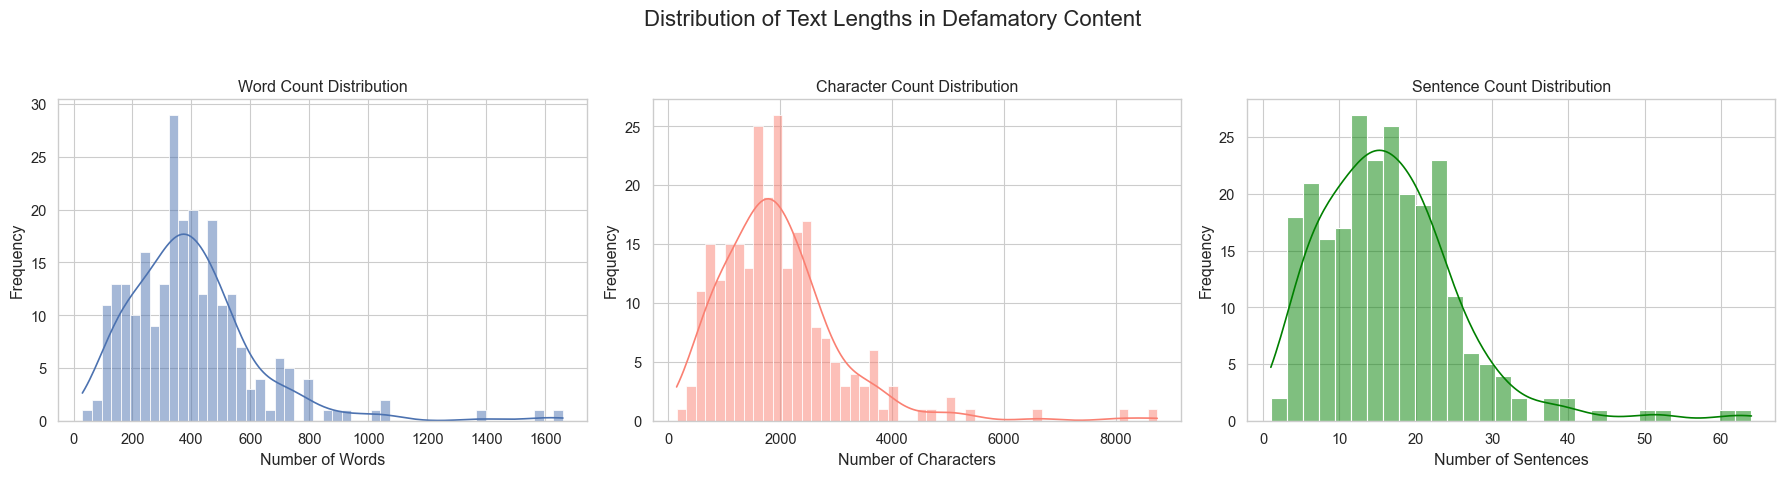



--- 3. Linguistic Feature Analysis ---

Top 20 Unigrams (Keywords):
[('source', np.int64(284)), ('new', np.int64(241)), ('said', np.int64(240)), ('just', np.int64(217)), ('year', np.int64(201)), ('star', np.int64(194)), ('told', np.int64(194)), ('kim', np.int64(192)), ('time', np.int64(185)), ('like', np.int64(179)), ('life', np.int64(152)), ('insider', np.int64(151)), ('kardashian', np.int64(136)), ('old', np.int64(135)), ('justin', np.int64(135)), ('taylor', np.int64(135)), ('brad', np.int64(133)), ('kanye', np.int64(131)), ('jennifer', np.int64(117)), ('love', np.int64(115))]

Top 20 Bigrams (Common Phrases):
[('year old', np.int64(102)), ('kim kardashian', np.int64(62)), ('brad pitt', np.int64(55)), ('angelina jolie', np.int64(54)), ('kanye west', np.int64(51)), ('taylor swift', np.int64(50)), ('source told', np.int64(46)), ('selena gomez', np.int64(44)), ('jennifer aniston', np.int64(40)), ('justin bieber', np.int64(38)), ('source said', np.int64(35)), ('new york', np.int64(35))

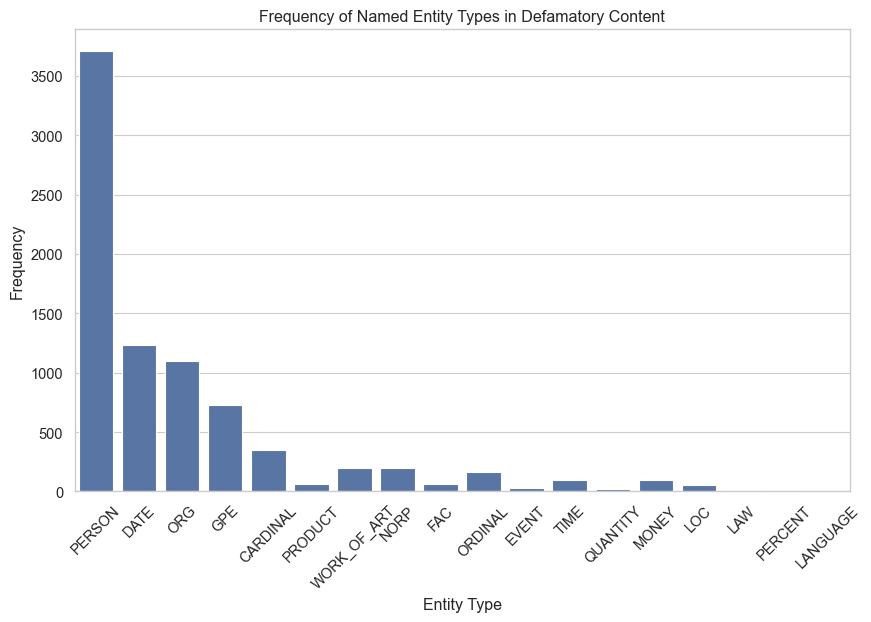



--- 4. Topic Modeling ---

Identified Topics in the Defamation Dataset:


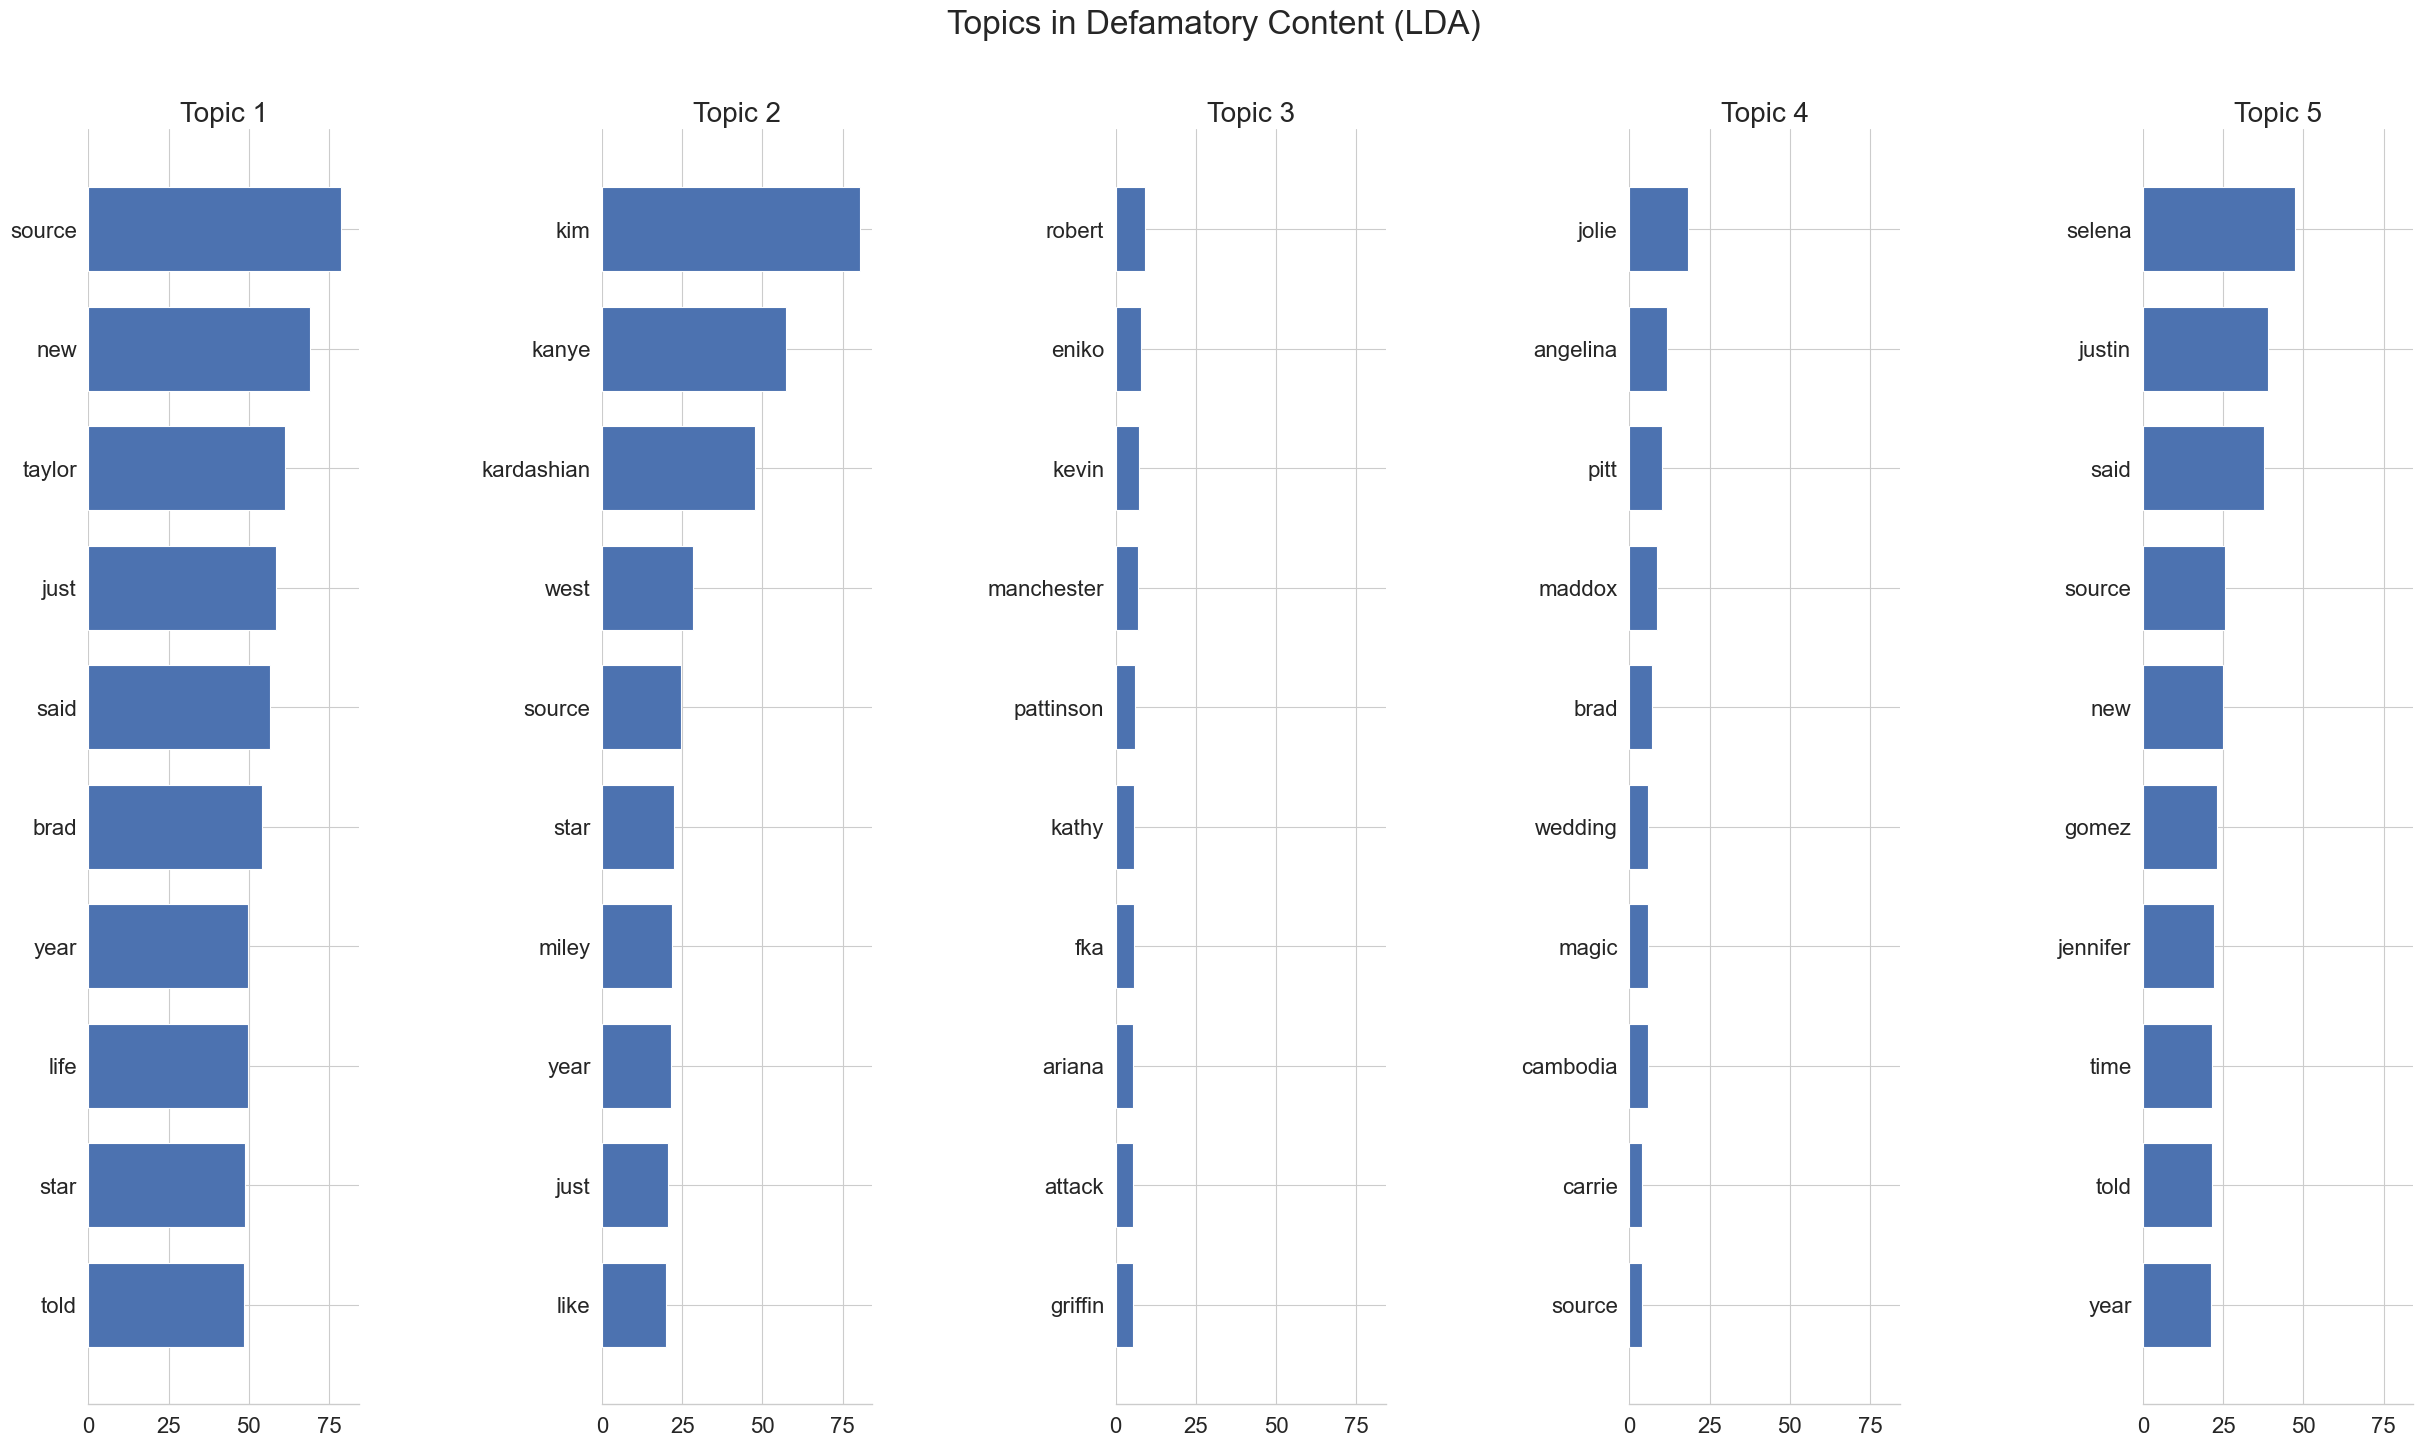



✨ Exploratory Data Analysis Complete.


In [5]:
# -*- coding: utf-8 -*-
"""
Exploratory Data Analysis (EDA) of the Defamation Dataset.

This script conducts a detailed analysis of a dataset containing defamatory content,
focusing on text length, linguistic features (n-grams, POS tags, named entities),
and topic modeling to gain insights for NLP model development.
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import spacy
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# --- Setup and Configuration ---
# Download necessary NLTK and spaCy models if not already present
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
    nltk.data.find('taggers/averaged_perceptron_tagger')
except LookupError: # Corrected exception type
    print("Downloading necessary NLTK data packages...")
    nltk.download('punkt')
    nltk.download('stopwords')
    nltk.download('averaged_perceptron_tagger') # Ensure this is downloaded

try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("Downloading spaCy model 'en_core_web_sm'...")
    from spacy.cli import download
    download("en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")

# Set plot style for academic-style visualizations
sns.set_theme(style="whitegrid", context="paper", font_scale=1.2)
pd.options.display.max_colwidth = 200

# --- Load Data ---
FILE_PATH = 'data/defamation_traintest.csv'
try:
    df = pd.read_csv(FILE_PATH)
except FileNotFoundError:
    print(f"❌ Error: The file '{FILE_PATH}' was not found. Please ensure it's in the correct directory.")
    exit()

print("--- 1. Initial Data Inspection ---")
print(df.info())
print("\nSample of the dataset:")
print(df.head())
print("\n" + "="*80 + "\n")

# --- 2. Text Length Analysis ---
print("--- 2. Text Length Analysis ---")
df['char_length'] = df['Comments'].str.len()
df['word_count'] = df['Comments'].apply(lambda x: len(word_tokenize(str(x))))
df['sentence_count'] = df['Comments'].apply(lambda x: len(sent_tokenize(str(x))))

print("Descriptive statistics for text lengths:")
print(df[['char_length', 'word_count', 'sentence_count']].describe())

plt.figure(figsize=(18, 5))
plt.suptitle('Distribution of Text Lengths in Defamatory Content', fontsize=16)

plt.subplot(1, 3, 1)
sns.histplot(df['word_count'], kde=True, bins=50)
plt.title('Word Count Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(df['char_length'], kde=True, bins=50, color='salmon')
plt.title('Character Count Distribution')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(df['sentence_count'], kde=True, bins=30, color='green')
plt.title('Sentence Count Distribution')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
print("\n" + "="*80 + "\n")


# --- 3. Linguistic Feature Analysis ---
print("--- 3. Linguistic Feature Analysis ---")
stop_words = set(stopwords.words('english'))

def get_top_ngrams(corpus, n=1, top_k=20):
    """Utility function to get top n-grams."""
    vec = CountVectorizer(ngram_range=(n, n), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:top_k]

# N-gram Analysis
top_unigrams = get_top_ngrams(df['Comments'], n=1, top_k=20)
top_bigrams = get_top_ngrams(df['Comments'], n=2, top_k=20)
top_trigrams = get_top_ngrams(df['Comments'], n=3, top_k=20)

print("\nTop 20 Unigrams (Keywords):")
print(top_unigrams)
print("\nTop 20 Bigrams (Common Phrases):")
print(top_bigrams)
print("\nTop 20 Trigrams (Longer Phrases):")
print(top_trigrams)


# Named Entity Recognition (NER)
def get_named_entities(text):
    """Extracts named entities using spaCy."""
    doc = nlp(str(text))
    return [(ent.text, ent.label_) for ent in doc.ents]

# Apply NER to a sample to avoid long processing times for the entire dataset in a demo
sample_size = min(len(df), 500)
df_sample = df.sample(n=sample_size, random_state=42)
df_sample['named_entities'] = df_sample['Comments'].apply(get_named_entities)

all_entities = [ent for sublist in df_sample['named_entities'] for ent in sublist]
entity_counts = Counter([ent[1] for ent in all_entities])
top_person_entities = Counter([ent[0] for ent in all_entities if ent[1] == 'PERSON']).most_common(15)

print("\nNamed Entity Type Frequencies (from sample):")
print(entity_counts)
print("\nTop 15 PERSON Entities Mentioned:")
print(top_person_entities)


plt.figure(figsize=(10, 6))
sns.barplot(x=list(entity_counts.keys()), y=list(entity_counts.values()))
plt.title('Frequency of Named Entity Types in Defamatory Content')
plt.xlabel('Entity Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
print("\n" + "="*80 + "\n")


# --- 4. Topic Modeling ---
print("--- 4. Topic Modeling ---")
def plot_top_words(model, feature_names, n_top_words, title):
    """Utility function to plot top words for LDA topics."""
    fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 20})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=16)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
    fig.suptitle(title, fontsize=24)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


# We will use a subset of the data for faster topic modeling
n_features = 1000
n_topics = 5
n_top_words = 10

# Create TF-IDF representation for LDA
tfidf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=n_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['Comments'])
feature_names = tfidf_vectorizer.get_feature_names_out()

# Run Latent Dirichlet Allocation (LDA)
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=5, learning_method='online', learning_offset=50., random_state=42).fit(tfidf)

print("\nIdentified Topics in the Defamation Dataset:")
plot_top_words(lda, feature_names, n_top_words, "Topics in Defamatory Content (LDA)")
print("\n" + "="*80 + "\n")

print("✨ Exploratory Data Analysis Complete.")



In [5]:
# --- Supervised-contrastive warm-up, then CE fine-tune for DistilBERT ---
import torch, torch.nn as nn, torch.nn.functional as F
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import Dataset

# 1) Tokenization (reuses your pattern)
def tokenize_for(model_name, ds: Dataset, max_length=256):
    tok = AutoTokenizer.from_pretrained(model_name, use_fast=True)
    def _tok(batch):
        return tok(batch["text"], truncation=True, padding="max_length", max_length=max_length)
    cols_to_remove = [c for c in ds.column_names if c not in ("text","label")]
    return ds.map(_tok, batched=True, remove_columns=cols_to_remove).with_format("torch")

# 2) SupCon model: encoder + projection head
class SupConEncoder(nn.Module):
    def __init__(self, model_name, proj_dim=128):
        super().__init__()
        self.encoder = AutoModel.from_pretrained(model_name)  # e.g., distilbert-base-uncased
        hid = self.encoder.config.hidden_size
        self.proj = nn.Sequential(
            nn.Linear(hid, hid), nn.ReLU(), nn.Linear(hid, proj_dim)
        )
    def forward(self, **inputs):
        out = self.encoder(**inputs)                         # DistilBERT has no pooler
        cls = out.last_hidden_state[:, 0, :]                 # [B, H]
        z = self.proj(cls)                                   # [B, D]
        z = F.normalize(z, dim=-1)
        return z

# 3) SupCon loss (Khosla et al. 2020)
def supervised_contrastive_loss(z, labels, temperature=0.1):
    # z: [N, D], labels: [N]
    sim = torch.matmul(z, z.T) / temperature                 # [N, N]
    # mask to remove self-comparisons
    self_mask = torch.eye(sim.size(0), device=sim.device, dtype=torch.bool)
    sim = sim.masked_fill(self_mask, float('-inf'))

    labels = labels.view(-1, 1)
    pos_mask = (labels == labels.T) & (~self_mask)           # positives = same label, not self
    # log-softmax over rows
    log_prob = sim - torch.logsumexp(sim, dim=1, keepdim=True)
    # for rows with at least one positive, average log-prob over positives
    pos_counts = pos_mask.sum(dim=1).clamp(min=1)
    loss = -(log_prob.masked_fill(~pos_mask, 0).sum(dim=1) / pos_counts).mean()
    return loss

# 4) Trainer for SupCon: forward twice (dropout noise gives two "views")
class SupConTrainer(Trainer):
    def __init__(self, temperature=0.1, **kwargs):
        super().__init__(**kwargs)
        self.temperature = temperature
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        # two stochastic passes through dropout = two views
        z1 = model(**inputs)
        z2 = model(**inputs)
        z = torch.cat([z1, z2], dim=0)                       # [2B, D]
        y = torch.cat([labels, labels], dim=0)               # [2B]
        loss = supervised_contrastive_loss(z, y, self.temperature)
        return (loss, {"z": z}) if return_outputs else loss

# 5) Orchestrator: warm-up then CE fine-tune
def supcon_then_ce(
    model_name="distilbert-base-uncased",
    output_dir="/mnt/data/distil_supcon",
    max_length=256,
    supcon_epochs=1,
    supcon_lr=2e-5,
    temperature=0.1,
    proj_dim=128,
    ce_epochs=3,
    ce_lr=2e-5,
    bsz_train=16,
    bsz_eval=32,
    seed=42
):
    torch.manual_seed(seed)

    # Tokenize once
    tok_train = tokenize_for(model_name, train_ds, max_length=max_length)
    tok_val   = tokenize_for(model_name, val_ds,   max_length=max_length)

    # ---------- Stage A: SupCon warm-up ----------
    supcon_model = SupConEncoder(model_name, proj_dim=proj_dim)
    supcon_args = TrainingArguments(
        output_dir=output_dir + "_supcon",
        eval_strategy="epoch",
        save_strategy="no",
        learning_rate=supcon_lr,
        per_device_train_batch_size=bsz_train,
        per_device_eval_batch_size=bsz_eval,
        num_train_epochs=supcon_epochs,
        warmup_ratio=0.06,
        weight_decay=0.01,
        logging_steps=50,
        report_to="none",
        seed=seed,
        fp16=torch.cuda.is_available()
    )
    supcon_trainer = SupConTrainer(
        model=supcon_model,
        args=supcon_args,
        train_dataset=tok_train,
        eval_dataset=tok_val,  # eval loss is also SupCon
        compute_metrics=None,
        temperature=temperature
    )
    if supcon_epochs > 0:
        supcon_trainer.train()

    # ---------- Stage B: CE fine-tune (classification) ----------
    clf_model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=4)
    # load encoder weights from supcon warm-up into classifier's base encoder
    clf_model.base_model.load_state_dict(supcon_model.encoder.state_dict(), strict=False)

    ce_args = TrainingArguments(
        output_dir=output_dir,
        eval_strategy="epoch",
        save_strategy="no",
        learning_rate=ce_lr,
        per_device_train_batch_size=bsz_train,
        per_device_eval_batch_size=bsz_eval,
        num_train_epochs=ce_epochs,
        warmup_ratio=0.06,
        weight_decay=0.01,
        logging_steps=50,
        load_best_model_at_end=False,
        report_to="none",
        seed=seed,
        fp16=torch.cuda.is_available()
    )

    ce_trainer = Trainer(
        model=clf_model,
        args=ce_args,
        train_dataset=tok_train,
        eval_dataset=tok_val,
        compute_metrics=compute_metrics,  # <- your metrics fn
    )
    ce_trainer.train()
    metrics = ce_trainer.evaluate()
    print("✅ CE metrics after SupCon warm-up:", metrics)

    # Save final classifier
    ce_trainer.save_model(output_dir)
    return metrics

# ---- Example runs ----
# Baseline (no warm-up): use your existing train_and_eval(...)
# With a short warm-up:
# supcon_then_ce(supcon_epochs=1, temperature=0.1, max_length=320, ce_epochs=4, output_dir="/mnt/data/distil_supcon_1x")


/opt/miniconda3/envs/cb/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
%pip install evaluate

  Using cached evaluate-0.4.5-py3-none-any.whl.metadata (9.5 kB)
Using cached evaluate-0.4.5-py3-none-any.whl (84 kB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
import os, numpy as np, pandas as pd, torch, evaluate
from datasets import Dataset
from sklearn.model_selection import train_test_split

# (optional) quiet the tokenizer fork warning
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# ---- load & split ----
df = pd.read_csv("data/final_dataset_with_normal.csv")[["text","label"]].dropna()
df["label"] = df["label"].astype(int)

train_df, val_df = train_test_split(
    df, test_size=0.2, stratify=df["label"], random_state=42
)
train_ds = Dataset.from_pandas(train_df.reset_index(drop=True))
val_ds   = Dataset.from_pandas(val_df.reset_index(drop=True))

# ---- metrics for the CE stage ----
acc = evaluate.load("accuracy")
f1  = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(axis=1)
    return {
        "accuracy": acc.compute(predictions=preds, references=labels)["accuracy"],
        "f1_macro": f1.compute(predictions=preds, references=labels, average="macro")["f1"]
    }


In [11]:
%pip install 'accelerate>=0.26.0

zsh:1: unmatched '
Note: you may need to restart the kernel to use updated packages.


In [ ]:
metrics = supcon_then_ce(
    model_name="distilbert-base-uncased",
    output_dir="data/distil_supcon_run1",
    max_length=320,          # try 256/320/384 depending on your sweep
    supcon_epochs=1,         # 0 disables the warm-up
    temperature=0.1,         # 0.05–0.2 are common
    proj_dim=128,
    ce_epochs=4,
    ce_lr=2e-5,
    bsz_train=16, bsz_eval=32,
    seed=42
)
print(metrics)


Map: 100%|██████████| 738/738 [00:00<00:00, 2408.39 examples/s]


ImportError: Using the `Trainer` with `PyTorch` requires `accelerate>=0.26.0`: Please run `pip install transformers[torch]` or `pip install 'accelerate>=0.26.0'`

In [ ]:
# we have two datasets, one is our final dataset and the second is synthetic data of defamation, we need to merge synthetic data text and label=2 to final Dataset

In [ ]:
#!/usr/bin/env python3
# merge_synthetic_defamation.py
import pandas as pd
from pathlib import Path

# ---- Paths: set these to your files ----
FINAL_CSV = Path("data/final_dataset_with_normal.csv")     # has columns: text,label
SYN_CSV   = Path("data/defamation_synthetic_97.csv")
OUT_CSV   = Path("data/final_plus_synthetic.csv")

# ---- Load ----
final_df = pd.read_csv(FINAL_CSV)
syn_raw  = pd.read_csv(SYN_CSV)

# ---- Sanity checks ----
need_final_cols = {"text", "label"}
if not need_final_cols.issubset(final_df.columns):
    raise ValueError(f"Final dataset must contain columns {need_final_cols}, got {final_df.columns.tolist()}")

need_syn_cols = {"post_content"}  # minimum needed
if not need_syn_cols.issubset(syn_raw.columns):
    raise ValueError(f"Synthetic dataset must contain at least {need_syn_cols}, got {syn_raw.columns.tolist()}")

if "category" in syn_raw.columns:
    syn_raw = syn_raw[syn_raw["category"].astype(str).str.lower().eq("defamation") | syn_raw["category"].isna()]


syn_df = pd.DataFrame({
    "text": syn_raw["post_content"].astype(str),
    "label": 2,  # Defamation
})
# Keep a marker to allow ablation studies later (won’t break your training script)
syn_df["is_synthetic"] = 1
final_df["is_synthetic"] = 0

# ---- Concatenate ----
merged = pd.concat([final_df, syn_df], ignore_index=True)

# ---- Clean + de-duplicate (exact text duplicates, case/space-insensitive) ----
def _norm(s: str) -> str:
    s = str(s)
    return " ".join(s.split()).strip().lower()

merged["__norm"] = merged["text"].map(_norm)
merged = merged.drop_duplicates(subset="__norm").drop(columns="__norm")

# Remove empty/NaN after cleaning
merged = merged[merged["text"].astype(str).str.strip().ne("")].dropna(subset=["text", "label"])

# ---- Shuffle (optional but nice) ----
merged = merged.sample(frac=1.0, random_state=42).reset_index(drop=True)

# ---- Save ----
OUT_CSV.parent.mkdir(parents=True, exist_ok=True)
merged.to_csv(OUT_CSV, index=False)

# ---- Quick summary ----
print("✅ Merge complete.")
print(f"Final rows: {len(merged):,}")
print("Label distribution:")
print(merged["label"].value_counts().sort_index().rename({0:"Normal",1:"Harassment",2:"Defamation",3:"Misleading"}))
print(f"\nSaved → {OUT_CSV}")


✅ Merge complete.
Final rows: 3,639
Label distribution:
label
Normal        1747
Harassment    1237
Defamation     249
Misleading     406
Name: count, dtype: int64

Saved → data/final_plus_synthetic.csv


/Users/arlankalin/legalrisk/results/distil_exps_20250810-135850/weighted_ce_len384/confusion_matrix.csv

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm_path = "/Users/arlankalin/legalrisk/results/distil_exps_20250815-142523/base_ce_len384_synt/confusion_matrix.csv"   # <- change to your filename
df_cm = pd.read_csv(cm_path, index_col=0)

target_names = ["Normal", "Harassment", "Defamation", "Misleading"]

row_order = [f"true_{t}" for t in target_names]
col_order = [f"pred_{t}" for t in target_names]
cm = df_cm.loc[row_order, col_order].to_numpy()

# fig, ax = plt.subplots(figsize=(6, 6), dpi=300)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
# disp.plot(ax=ax, cmap="Blues", colorbar=False, values_format="d")
# ax.set_xlabel("Predicted label"); ax.set_ylabel("True label")
# plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
# ax.set_title("DistillBERT 384 tokens with Data Augmentation")
# plt.tight_layout()
# os.makedirs("figs", exist_ok=True)
# plt.savefig("figs/confusion_matrix_counts.png", bbox_inches="tight", dpi=300)
# plt.show()

In [76]:
import os
import math
import pandas as pd
import numpy as np
import torch
from tqdm.auto import tqdm
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# ------------------------------ CONFIG ------------------------------
CSV_PATH   = "/Users/arlankalin/legalrisk/data/elonmusk_tweets.csv"      # <-- your input CSV path
MODEL_DIR  = "/Users/arlankalin/legalrisk/results/distil_exps_20250815-142523/base_ce_len384_synt"  # <-- folder with your trained model
OUTPUT_CSV = "data/elon_test.csv"

# Must match what you trained with
MAX_LENGTH = 384
BATCH_SIZE = 64

# Optional: silence HF tokenizers fork warning in notebooks
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# Your label id -> name mapping (must match training)
id2label = {
    0: "Normal",
    1: "Harassment",
    2: "Defamation",
    3: "Misleading",
}
label2id = {v:k for k, v in id2label.items()}

# --------------------------- LOAD MODEL -----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased", use_fast=True)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_DIR)
model.to(device)
model.eval()

print(f"✔ Loaded model from '{MODEL_DIR}' on device: {device}")
print("Labels:", id2label)

# ---------------------------- LOAD DATA -----------------------------
df = pd.read_csv(CSV_PATH)
if "text" not in df.columns:
    raise ValueError(
        f"'comment_text' column not found in CSV. Available columns: {list(df.columns)}"
    )

texts = df["text"].astype(str).fillna("").tolist()
n = len(texts)
print(f"✔ Loaded {n} rows from {CSV_PATH}")

# -------------------------- BATCH INFERENCE -------------------------
def softmax_np(x):
    x = x - np.max(x, axis=1, keepdims=True)
    e = np.exp(x)
    return e / np.sum(e, axis=1, keepdims=True)

all_preds = np.empty(n, dtype=np.int64)
all_probs = np.empty((n, len(id2label)), dtype=np.float32)

with torch.no_grad():
    for start in tqdm(range(0, n, BATCH_SIZE), total=math.ceil(n / BATCH_SIZE), desc="Scoring"):
        end = min(start + BATCH_SIZE, n)
        batch_texts = texts[start:end]

        enc = tokenizer(
            batch_texts,
            truncation=True,
            padding=True,              # dynamic padding per batch
            max_length=MAX_LENGTH,
            return_tensors="pt",
        )
        enc = {k: v.to(device) for k, v in enc.items()}

        logits = model(**enc).logits
        probs = torch.softmax(logits, dim=-1).detach().cpu().numpy()
        preds = np.argmax(probs, axis=1)

        all_probs[start:end, :] = probs
        all_preds[start:end] = preds

# ------------------------- ATTACH & SAVE ----------------------------
df["pred_label_id"]   = all_preds
df["pred_label_name"] = [id2label[i] for i in all_preds]
df["p_Normal"]        = all_probs[:, label2id["Normal"]]
df["p_Harassment"]    = all_probs[:, label2id["Harassment"]]
df["p_Defamation"]    = all_probs[:, label2id["Defamation"]]
df["p_Misleading"]    = all_probs[:, label2id["Misleading"]]
df["pred_confidence"] = all_probs[np.arange(n), all_preds]

# Optional: simple risk flag (not required)
df["risk_flag"] = (df["pred_label_name"] != "Normal") & (df["pred_confidence"] >= 0.50)

# Keep original columns first; append predictions at the end
pred_cols = [
    "pred_label_id", "pred_label_name",
    "p_Normal", "p_Harassment", "p_Defamation", "p_Misleading",
    "pred_confidence", "risk_flag",
]
ordered_cols = [c for c in df.columns if c not in pred_cols] + pred_cols
df = df[ordered_cols]

os.makedirs(os.path.dirname(OUTPUT_CSV) or ".", exist_ok=True)
df.to_csv(OUTPUT_CSV, index=False)
print(f"✔ Saved scored CSV → {OUTPUT_CSV}")

# Peek
df.head()

✔ Loaded model from '/Users/arlankalin/legalrisk/results/distil_exps_20250815-142523/base_ce_len384_synt' on device: cpu
Labels: {0: 'Normal', 1: 'Harassment', 2: 'Defamation', 3: 'Misleading'}
✔ Loaded 2819 rows from /Users/arlankalin/legalrisk/data/elonmusk_tweets.csv


Scoring: 100%|██████████| 45/45 [01:23<00:00,  1.85s/it]


✔ Saved scored CSV → data/elon_test.csv


,id,created_at,text,pred_label_id,pred_label_name,p_Normal,p_Harassment,p_Defamation,p_Misleading,pred_confidence,risk_flag
0,849636868052275200,2017-04-05T14:56:29,b'And so the robots spared humanity ... https:...,0,Normal,0.995328,0.002467,0.001331,0.000873,0.995328,False
1,848988730585096192,2017-04-03T20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa...",0,Normal,0.995736,0.001724,0.001588,0.000953,0.995736,False
2,848943072423497728,2017-04-03T16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'",0,Normal,0.994023,0.003606,0.000992,0.001379,0.994023,False
3,848935705057280001,2017-04-03T16:30:19,b'Stormy weather in Shortville ...',0,Normal,0.783210,0.190884,0.004716,0.021189,0.783210,False
4,848416049573658624,2017-04-02T06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ...",0,Normal,0.752887,0.239354,0.003926,0.003834,0.752887,False


In [44]:
df.head()

,id,created_at,text,pred_label_id,pred_label_name,p_Normal,p_Harassment,p_Defamation,p_Misleading,pred_confidence,risk_flag
0,849636868052275200,2017-04-05T14:56:29,b'And so the robots spared humanity ... https:...,0,Normal,0.996088,0.001826,0.001258,0.000828,0.996088,False
1,848988730585096192,2017-04-03T20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa...",0,Normal,0.996171,0.001393,0.001493,0.000942,0.996171,False
2,848943072423497728,2017-04-03T16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'",0,Normal,0.994933,0.002728,0.001017,0.001322,0.994933,False
3,848935705057280001,2017-04-03T16:30:19,b'Stormy weather in Shortville ...',0,Normal,0.891928,0.085471,0.003732,0.018869,0.891928,False
4,848416049573658624,2017-04-02T06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ...",0,Normal,0.942391,0.052943,0.001913,0.002754,0.942391,False


In [77]:
total = len(df)
counts = df["pred_label_name"].value_counts()
print(counts)

pred_label_name
Normal        2630
Misleading     123
Harassment      66
Name: count, dtype: int64


In [78]:
counts = df['pred_label_name'].value_counts().reindex(
    ['Normal','Harassment','Defamation','Misleading'], fill_value=0
)
perc = (counts / len(df) * 100).round(2)

print("=== Predicted class distribution ===")
summary = pd.DataFrame({'count': counts, 'percent': perc})
display(summary)

=== Predicted class distribution ===


,count,percent
pred_label_name,,
Normal,2630,93.30
Harassment,66,2.34
Defamation,0,0.00
Misleading,123,4.36


In [42]:
# df.columns = [col.replace('Text', 'text') for col in df.columns]

In [79]:
df['char_len'] = df['text'].astype(str).str.len()
df['word_len'] = df['text'].astype(str).str.split().apply(len)

# Overall stats
print("\n=== Overall text length stats ===")
display(df[['char_len','word_len']].describe().round(2))

print("\n=== Overall confidence stats ===")
display(df['pred_confidence'].describe().round(3))

# Per-class stats
by = df.groupby('pred_label_name')
print("\n=== Per-class counts & means ===")
display(by.agg(
    count=('text','size'),
    mean_conf=('pred_confidence','mean'),
    median_conf=('pred_confidence','median'),
    mean_chars=('char_len','mean'),
    median_chars=('char_len','median'),
    mean_words=('word_len','mean'),
    median_words=('word_len','median'),
).reindex(['Normal','Harassment','Defamation','Misleading']).round(3))


=== Overall text length stats ===


,char_len,word_len
count,2819.00,2819.00
mean,100.41,14.71
std,40.55,6.78
min,4.00,1.00
25%,68.00,9.00
50%,111.00,16.00
75%,132.00,20.00
max,262.00,31.00



=== Overall confidence stats ===


count    2819.000
mean        0.963
std         0.089
min         0.390
25%         0.987
50%         0.995
75%         0.996
max         0.996
Name: pred_confidence, dtype: float64


=== Per-class counts & means ===


,count,mean_conf,median_conf,mean_chars,median_chars,mean_words,median_words
pred_label_name,,,,,,,
Normal,2630.0,0.973,0.995,100.119,110.0,14.529,16.0
Harassment,66.0,0.882,0.953,86.470,95.5,14.136,15.0
Defamation,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Misleading,123.0,0.809,0.861,114.065,122.0,18.919,20.0


In [80]:
def preview_examples(df, label, n=5, high_conf=True, conf_min=0.80):
    """Show n examples for a label; optionally filter to high-confidence."""
    subset = df[df['pred_label_name'] == label].copy()
    if high_conf:
        subset = subset[subset['pred_confidence'] >= conf_min]
    # Shorten text for display
    subset['text_preview'] = subset['text'].str.slice(0, 200) + \
                             subset['text'].str.slice(200, 201).apply(lambda x: '…' if x else '')
    cols = ['pred_label_name','pred_confidence','text_preview']
    return subset.sort_values('pred_confidence', ascending=False)[cols].head(n)

print("\n=== High-confidence examples (≥0.80) ===")
for lab in ['Normal','Harassment','Defamation','Misleading']:
    print(f"\n-- {lab} --")
    display(preview_examples(df, lab, n=5, high_conf=True, conf_min=0.80))


=== High-confidence examples (≥0.80) ===

-- Normal --


,pred_label_name,pred_confidence,text_preview
2793,Normal,0.996357,b'RT @TheOnion: Vending Machine Attendant Admi...
2415,Normal,0.996329,b'RT @NASA: Want to join us and cover the next...
2410,Normal,0.996285,b'One often hears that there is no point in a ...
2403,Normal,0.996263,b'RT @willsamari: @elonmusk you should let eve...
2147,Normal,0.996242,b'You Can Fit A Lot Of Kindergartners In A Tes...



-- Harassment --


,pred_label_name,pred_confidence,text_preview
231,Harassment,0.992480,b'@BullFlags Yeah. And Twitter is a hater Hell...
8,Harassment,0.992418,"b""Why did we waste so much time developing sil..."
64,Harassment,0.991092,b'@meangene2030 Damn straight we do! Coming wi...
901,Harassment,0.990573,b'@fucktyler Thanks Tyler'
418,Harassment,0.988380,b'Traffic is driving me nuts. Am going to buil...



-- Defamation --


,pred_label_name,pred_confidence,text_preview



-- Misleading --


,pred_label_name,pred_confidence,text_preview
2177,Misleading,0.970725,b'Me &amp; other private money funded Tesla fo...
2129,Misleading,0.969845,b'Battery storage of solar power needed for ni...
1757,Misleading,0.968771,b'Pack swap now operating in limited beta mode...
1178,Misleading,0.968731,"b'Model 3 orders at 180,000 in 24 hours. Selli..."
511,Misleading,0.965599,b'Solar glass tiles can also incorporate heati...


In [50]:
# Borderline band: confidence near 0.5
band = df[(df['pred_confidence'] >= 0.45) & (df['pred_confidence'] <= 0.55)].copy()
band['text_preview'] = band['text'].str.slice(0, 200) + \
                       band['text'].str.slice(200, 201).apply(lambda x: '…' if x else '')
cols = ['pred_label_name','pred_confidence','text_preview']
print(f"Borderline items in 0.45–0.55 band: {len(band)}")
display(band.sort_values('pred_confidence').head(10)[cols])

Borderline items in 0.45–0.55 band: 32


,pred_label_name,pred_confidence,text_preview
1171,Misleading,0.468577,b'@Jbourquee Giga is designed to self-power vi...
1080,Misleading,0.473676,b'Activate autopilot 4X in quick succession fo...
1585,Normal,0.474866,b'Cause of hard rocket landing confirmed as du...
2078,Normal,0.480291,b'Will post video next week of designing a roc...
1828,Misleading,0.480824,b'Three engine F9R Dev1 vehicle auto-terminate...
1284,Misleading,0.483452,b'My best guess for 2016: ~70% landing success...
2664,Normal,0.484556,"b'Woohoo, rocket hold down firing completed an..."
2101,Misleading,0.489197,b'Just completed full mission duration firing ...
2400,Misleading,0.495717,b'Holding on solar array deployment until at l...
242,Harassment,0.500110,b'@humplik The remedy for that is changing the...


In [51]:
harassment_df = df[df['pred_label_name'] == 'Harassment']

# Save harassment examples to a new CSV file
harassment_df.to_csv('harassment_elonexamples.csv', index=False)

# Filter for misleading examples
misleading_df = df[df['pred_label_name'] == 'Misleading']

# Save misleading examples to a new CSV file
misleading_df.to_csv('misleading_elonexamples.csv', index=False)

print("Saved harassment_examples.csv and misleading_examples.csv")

Saved harassment_examples.csv and misleading_examples.csv


In [64]:
import os
import math
import pandas as pd
import numpy as np
import torch
from tqdm.auto import tqdm
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# ------------------------------ CONFIG ------------------------------
CSV_PATH   = "/Users/arlankalin/legalrisk/data/trumptweets1205-127.csv"      # <-- your input CSV path
MODEL_DIR  = "/Users/arlankalin/legalrisk/results/distil_exps_20250810-135850/weighted_ce_len384"  # <-- folder with your trained model
OUTPUT_CSV = "data/trump_test.csv"

# Must match what you trained with
MAX_LENGTH = 384
BATCH_SIZE = 64

# Optional: silence HF tokenizers fork warning in notebooks
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# Your label id -> name mapping (must match training)
id2label = {
    0: "Normal",
    1: "Harassment",
    2: "Defamation",
    3: "Misleading",
}
label2id = {v:k for k, v in id2label.items()}

# --------------------------- LOAD MODEL -----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased", use_fast=True)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_DIR)
model.to(device)
model.eval()

print(f"✔ Loaded model from '{MODEL_DIR}' on device: {device}")
print("Labels:", id2label)

# ---------------------------- LOAD DATA -----------------------------
df = pd.read_csv(CSV_PATH, encoding="latin-1")
if "Tweet" not in df.columns:
    raise ValueError(
        f"'Tweet' column not found in CSV. Available columns: {list(df.columns)}"
    )

texts = df["Tweet"].astype(str).fillna("").tolist()
n = len(texts)
print(f"✔ Loaded {n} rows from {CSV_PATH}")

# -------------------------- BATCH INFERENCE -------------------------
def softmax_np(x):
    x = x - np.max(x, axis=1, keepdims=True)
    e = np.exp(x)
    return e / np.sum(e, axis=1, keepdims=True)

all_preds = np.empty(n, dtype=np.int64)
all_probs = np.empty((n, len(id2label)), dtype=np.float32)

with torch.no_grad():
    for start in tqdm(range(0, n, BATCH_SIZE), total=math.ceil(n / BATCH_SIZE), desc="Scoring"):
        end = min(start + BATCH_SIZE, n)
        batch_texts = texts[start:end]

        enc = tokenizer(
            batch_texts,
            truncation=True,
            padding=True,              # dynamic padding per batch
            max_length=MAX_LENGTH,
            return_tensors="pt",
        )
        enc = {k: v.to(device) for k, v in enc.items()}

        logits = model(**enc).logits
        probs = torch.softmax(logits, dim=-1).detach().cpu().numpy()
        preds = np.argmax(probs, axis=1)

        all_probs[start:end, :] = probs
        all_preds[start:end] = preds

# ------------------------- ATTACH & SAVE ----------------------------
df["pred_label_id"]   = all_preds
df["pred_label_name"] = [id2label[i] for i in all_preds]
df["p_Normal"]        = all_probs[:, label2id["Normal"]]
df["p_Harassment"]    = all_probs[:, label2id["Harassment"]]
df["p_Defamation"]    = all_probs[:, label2id["Defamation"]]
df["p_Misleading"]    = all_probs[:, label2id["Misleading"]]
df["pred_confidence"] = all_probs[np.arange(n), all_preds]

# Optional: simple risk flag (not required)
df["risk_flag"] = (df["pred_label_name"] != "Normal") & (df["pred_confidence"] >= 0.50)

# Keep original columns first; append predictions at the end
pred_cols = [
    "pred_label_id", "pred_label_name",
    "p_Normal", "p_Harassment", "p_Defamation", "p_Misleading",
    "pred_confidence", "risk_flag",
]
ordered_cols = [c for c in df.columns if c not in pred_cols] + pred_cols
df = df[ordered_cols]

os.makedirs(os.path.dirname(OUTPUT_CSV) or ".", exist_ok=True)
df.to_csv(OUTPUT_CSV, index=False)
print(f"✔ Saved scored CSV → {OUTPUT_CSV}")

# Peek
df.head()

✔ Loaded model from '/Users/arlankalin/legalrisk/results/distil_exps_20250810-135850/weighted_ce_len384' on device: cpu
Labels: {0: 'Normal', 1: 'Harassment', 2: 'Defamation', 3: 'Misleading'}
✔ Loaded 297 rows from /Users/arlankalin/legalrisk/data/trumptweets1205-127.csv


Scoring: 100%|██████████| 5/5 [00:07<00:00,  1.40s/it]

✔ Saved scored CSV → data/trump_test.csv


,Date,Time,Tweet,Tweetid,pred_label_id,pred_label_name,p_Normal,p_Harassment,p_Defamation,p_Misleading,pred_confidence,risk_flag
0,2016-12-05 13:53:11+00:00,13:53:11,I am thrilled to nominate Dr. @RealBenCarson a...,805772007220645000,0,Normal,0.996305,0.001238,0.001499,0.000957,0.996305,False
1,2016-12-05 16:00:27+00:00,16:00:27,If the press would cover me accurately &amp; h...,805804034309427000,0,Normal,0.995885,0.001765,0.001407,0.000943,0.995885,False
2,2016-12-05 23:06:43+00:00,23:06:43,#ThankYouTour2016 \r\n\r\n12/6- North Carolina...,805911307270713000,0,Normal,0.996116,0.001408,0.001461,0.001015,0.996116,False
3,2016-12-06 13:52:35+00:00,13:52:35,Boeing is building a brand new 747 Air Force O...,806134244384899000,0,Normal,0.894137,0.042572,0.015159,0.048132,0.894137,False
4,2016-12-06 16:45:27+00:00,16:45:27,"Join me tonight in Fayetteville, North Carolin...",806177746397306000,0,Normal,0.996128,0.001350,0.001451,0.001071,0.996128,False


In [ ]:
counts = df['pred_label_name'].value_counts().reindex(
    ['Normal','Harassment','Defamation','Misleading'], fill_value=0
)
perc = (counts / len(df) * 100).round(2)

print("=== Predicted class distribution ===")
summary = pd.DataFrame({'count': counts, 'percent': perc})
display(summary)

=== Predicted class distribution ===


,count,percent
pred_label_name,,
Normal,243,81.82
Harassment,43,14.48
Defamation,0,0.00
Misleading,11,3.70


In [70]:
df['char_len'] = df['Tweet'].astype(str).str.len()
df['word_len'] = df['Tweet'].astype(str).str.split().apply(len)
print(list(df.columns))
# Overall stats
print("\n=== Overall Tweet length stats ===")
display(df[['char_len','word_len']].describe().round(2))

print("\n=== Overall confidence stats ===")
display(df['pred_confidence'].describe().round(3))

# Per-class stats
by = df.groupby('pred_label_name')
print("\n=== Per-class counts & means ===")
display(by.agg(
    count=('Tweet','size'),
    mean_conf=('pred_confidence','mean'),
    median_conf=('pred_confidence','median'),
    mean_chars=('char_len','mean'),
    median_chars=('char_len','median'),
    mean_words=('word_len','mean'),
    median_words=('word_len','median'),
).reindex(['Normal','Harassment','Defamation','Misleading']).round(3))

def preview_examples(df, label, n=5, high_conf=True, conf_min=0.80):
    """Show n examples for a label; optionally filter to high-confidence."""
    subset = df[df['pred_label_name'] == label].copy()
    if high_conf:
        subset = subset[subset['pred_confidence'] >= conf_min]
    # Shorten text for display
    subset['text_preview'] = subset['Tweet'].str.slice(0, 200) + \
                             subset['Tweet'].str.slice(200, 201).apply(lambda x: '…' if x else '')
    cols = ['pred_label_name','pred_confidence','text_preview']
    return subset.sort_values('pred_confidence', ascending=False)[cols].head(n)

print("\n=== High-confidence examples (≥0.80) ===")
for lab in ['Normal','Harassment','Defamation','Misleading']:
    print(f"\n-- {lab} --")
    display(preview_examples(df, lab, n=5, high_conf=True, conf_min=0.80))

['Date', 'Time', 'Tweet', 'Tweetid', 'pred_label_id', 'pred_label_name', 'p_Normal', 'p_Harassment', 'p_Defamation', 'p_Misleading', 'pred_confidence', 'risk_flag', 'char_len', 'word_len']

=== Overall Tweet length stats ===


,char_len,word_len
count,297.00,297.00
mean,124.90,20.30
std,25.98,6.04
min,39.00,2.00
25%,122.00,17.00
50%,137.00,22.00
75%,140.00,25.00
max,149.00,30.00



=== Overall confidence stats ===


count    297.000
mean       0.940
std        0.112
min        0.443
25%        0.956
50%        0.991
75%        0.996
max        0.996
Name: pred_confidence, dtype: float64


=== Per-class counts & means ===


,count,mean_conf,median_conf,mean_chars,median_chars,mean_words,median_words
pred_label_name,,,,,,,
Normal,243.0,0.955,0.993,123.173,137.0,19.683,21.0
Harassment,43.0,0.900,0.979,133.698,139.0,23.140,24.0
Defamation,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Misleading,11.0,0.746,0.751,128.545,137.0,22.727,24.0



=== High-confidence examples (≥0.80) ===

-- Normal --


,pred_label_name,pred_confidence,text_preview
294,Normal,0.996383,.@VP Mike Pence will be speaking at today's #M...
60,Normal,0.996374,Thank you Florida. My Administration will foll...
175,Normal,0.996345,RT @MeetThePress: Watch our interview with @Ke...
290,Normal,0.996338,Miami-Dade Mayor drops sanctuary policy. Right...
271,Normal,0.996336,Great meeting with automobile industry leaders...



-- Harassment --


,pred_label_name,pred_confidence,text_preview
203,Harassment,0.992489,Totally made up facts by sleazebag political o...
167,Harassment,0.992476,Having a good relationship with Russia is a go...
110,Harassment,0.992413,Russians are playing @CNN and @NBCNews for suc...
88,Harassment,0.991597,The terrorist who killed so many people in Ger...
89,Harassment,0.991289,slaughter you. This is a purely religious thre...



-- Defamation --


,pred_label_name,pred_confidence,text_preview



-- Misleading --


,pred_label_name,pred_confidence,text_preview
100,Misleading,0.907338,"The DJT Foundation, unlike most foundations, n..."
215,Misleading,0.835271,will only get higher. Car companies and others...


In [86]:
import os
import math
import pandas as pd
import numpy as np
import torch
from tqdm.auto import tqdm
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# ------------------------------ CONFIG ------------------------------
CSV_PATH   = "/Users/arlankalin/legalrisk/data/defamation_traintest.csv"      # <-- your input CSV path
MODEL_DIR  = "/Users/arlankalin/legalrisk/results/distil_exps_20250810-135850/weighted_ce_len384"  # <-- folder with your trained model
OUTPUT_CSV = "data/trump_test.csv"

# Must match what you trained with
MAX_LENGTH = 384
BATCH_SIZE = 64

# Optional: silence HF tokenizers fork warning in notebooks
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# Your label id -> name mapping (must match training)
id2label = {
    0: "Normal",
    1: "Harassment",
    2: "Defamation",
    3: "Misleading",
}
label2id = {v:k for k, v in id2label.items()}

# --------------------------- LOAD MODEL -----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased", use_fast=True)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_DIR)
model.to(device)
model.eval()

print(f"✔ Loaded model from '{MODEL_DIR}' on device: {device}")
print("Labels:", id2label)

# ---------------------------- LOAD DATA -----------------------------
df = pd.read_csv(CSV_PATH, encoding="latin-1")
if "Comments" not in df.columns:
    raise ValueError(
        f"'Comments' column not found in CSV. Available columns: {list(df.columns)}"
    )

texts = df["Comments"].astype(str).fillna("").tolist()
n = len(texts)
print(f"✔ Loaded {n} rows from {CSV_PATH}")

# -------------------------- BATCH INFERENCE -------------------------
def softmax_np(x):
    x = x - np.max(x, axis=1, keepdims=True)
    e = np.exp(x)
    return e / np.sum(e, axis=1, keepdims=True)

all_preds = np.empty(n, dtype=np.int64)
all_probs = np.empty((n, len(id2label)), dtype=np.float32)

with torch.no_grad():
    for start in tqdm(range(0, n, BATCH_SIZE), total=math.ceil(n / BATCH_SIZE), desc="Scoring"):
        end = min(start + BATCH_SIZE, n)
        batch_texts = texts[start:end]

        enc = tokenizer(
            batch_texts,
            truncation=True,
            padding=True,              # dynamic padding per batch
            max_length=MAX_LENGTH,
            return_tensors="pt",
        )
        enc = {k: v.to(device) for k, v in enc.items()}

        logits = model(**enc).logits
        probs = torch.softmax(logits, dim=-1).detach().cpu().numpy()
        preds = np.argmax(probs, axis=1)

        all_probs[start:end, :] = probs
        all_preds[start:end] = preds

# ------------------------- ATTACH & SAVE ----------------------------
df["pred_label_id"]   = all_preds
df["pred_label_name"] = [id2label[i] for i in all_preds]
df["p_Normal"]        = all_probs[:, label2id["Normal"]]
df["p_Harassment"]    = all_probs[:, label2id["Harassment"]]
df["p_Defamation"]    = all_probs[:, label2id["Defamation"]]
df["p_Misleading"]    = all_probs[:, label2id["Misleading"]]
df["pred_confidence"] = all_probs[np.arange(n), all_preds]

# Optional: simple risk flag (not required)
df["risk_flag"] = (df["pred_label_name"] != "Normal") & (df["pred_confidence"] >= 0.50)

# Keep original columns first; append predictions at the end
pred_cols = [
    "pred_label_id", "pred_label_name",
    "p_Normal", "p_Harassment", "p_Defamation", "p_Misleading",
    "pred_confidence", "risk_flag",
]
ordered_cols = [c for c in df.columns if c not in pred_cols] + pred_cols
df = df[ordered_cols]

os.makedirs(os.path.dirname(OUTPUT_CSV) or ".", exist_ok=True)
df.to_csv(OUTPUT_CSV, index=False)
print(f"✔ Saved scored CSV → {OUTPUT_CSV}")

# Peek
df.head()

✔ Loaded model from '/Users/arlankalin/legalrisk/results/distil_exps_20250810-135850/weighted_ce_len384' on device: cpu
Labels: {0: 'Normal', 1: 'Harassment', 2: 'Defamation', 3: 'Misleading'}
✔ Loaded 249 rows from /Users/arlankalin/legalrisk/data/defamation_traintest.csv


Scoring: 100%|██████████| 4/4 [04:19<00:00, 64.76s/it]

✔ Saved scored CSV → data/trump_test.csv


,Unnamed: 0,Comments,label,pred_label_id,pred_label_name,p_Normal,p_Harassment,p_Defamation,p_Misleading,pred_confidence,risk_flag
0,2542,Brad Pitt reportedly dating Princess Charlotte...,2,2,Defamation,0.196645,0.007352,0.790490,0.005512,0.790490,True
1,2562,Ellen DeGeneres Is Now In The Middle Of Kelly ...,2,2,Defamation,0.477751,0.010941,0.506398,0.004910,0.506398,True
2,2638,Megyn Kelly's Latest Look on 'Today' Sparks Pl...,2,0,Normal,0.510826,0.006470,0.477554,0.005150,0.510826,False
3,2465,PLOT TWIST IN 'FATHER-SON' MOVIEMAKER MYSTERY\...,2,0,Normal,0.973071,0.002739,0.022401,0.001789,0.973071,False
4,2418,Jennifer Lopez & A-Rod Wedding On The Way? He ...,2,2,Defamation,0.055138,0.007033,0.931959,0.005869,0.931959,True


In [58]:
counts = df['pred_label_name'].value_counts().reindex(
    ['Normal','Harassment','Defamation','Misleading'], fill_value=0
)
perc = (counts / len(df) * 100).round(2)

print("=== Predicted class distribution ===")
summary = pd.DataFrame({'count': counts, 'percent': perc})
display(summary)

=== Predicted class distribution ===


,count,percent
pred_label_name,,
Normal,42,16.87
Harassment,3,1.20
Defamation,204,81.93
Misleading,0,0.00


In [61]:
import os
import math
import pandas as pd
import numpy as np
import torch
from tqdm.auto import tqdm
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# ------------------------------ CONFIG ------------------------------
CSV_PATH   = "/Users/arlankalin/legalrisk/data/fortune-100-tweets.csv"      # <-- your input CSV path
MODEL_DIR  = "/Users/arlankalin/legalrisk/results/distil_exps_20250810-135850/weighted_ce_len384"  # <-- folder with your trained model
OUTPUT_CSV = "data/fortune100_test.csv"

# Must match what you trained with
MAX_LENGTH = 384
BATCH_SIZE = 64

# Optional: silence HF tokenizers fork warning in notebooks
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# Your label id -> name mapping (must match training)
id2label = {
    0: "Normal",
    1: "Harassment",
    2: "Defamation",
    3: "Misleading",
}
label2id = {v:k for k, v in id2label.items()}

# --------------------------- LOAD MODEL -----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased", use_fast=True)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_DIR)
model.to(device)
model.eval()

print(f"✔ Loaded model from '{MODEL_DIR}' on device: {device}")
print("Labels:", id2label)

# ---------------------------- LOAD DATA -----------------------------
df = pd.read_csv(CSV_PATH)
if "Text" not in df.columns:
    raise ValueError(
        f"'Tweet' column not found in CSV. Available columns: {list(df.columns)}"
    )

texts = df["Text"].astype(str).fillna("").tolist()
n = len(texts)
print(f"✔ Loaded {n} rows from {CSV_PATH}")

# -------------------------- BATCH INFERENCE -------------------------
def softmax_np(x):
    x = x - np.max(x, axis=1, keepdims=True)
    e = np.exp(x)
    return e / np.sum(e, axis=1, keepdims=True)

all_preds = np.empty(n, dtype=np.int64)
all_probs = np.empty((n, len(id2label)), dtype=np.float32)

with torch.no_grad():
    for start in tqdm(range(0, n, BATCH_SIZE), total=math.ceil(n / BATCH_SIZE), desc="Scoring"):
        end = min(start + BATCH_SIZE, n)
        batch_texts = texts[start:end]

        enc = tokenizer(
            batch_texts,
            truncation=True,
            padding=True,              # dynamic padding per batch
            max_length=MAX_LENGTH,
            return_tensors="pt",
        )
        enc = {k: v.to(device) for k, v in enc.items()}

        logits = model(**enc).logits
        probs = torch.softmax(logits, dim=-1).detach().cpu().numpy()
        preds = np.argmax(probs, axis=1)

        all_probs[start:end, :] = probs
        all_preds[start:end] = preds

# ------------------------- ATTACH & SAVE ----------------------------
df["pred_label_id"]   = all_preds
df["pred_label_name"] = [id2label[i] for i in all_preds]
df["p_Normal"]        = all_probs[:, label2id["Normal"]]
df["p_Harassment"]    = all_probs[:, label2id["Harassment"]]
df["p_Defamation"]    = all_probs[:, label2id["Defamation"]]
df["p_Misleading"]    = all_probs[:, label2id["Misleading"]]
df["pred_confidence"] = all_probs[np.arange(n), all_preds]

# Optional: simple risk flag (not required)
df["risk_flag"] = (df["pred_label_name"] != "Normal") & (df["pred_confidence"] >= 0.50)

# Keep original columns first; append predictions at the end
pred_cols = [
    "pred_label_id", "pred_label_name",
    "p_Normal", "p_Harassment", "p_Defamation", "p_Misleading",
    "pred_confidence", "risk_flag",
]
ordered_cols = [c for c in df.columns if c not in pred_cols] + pred_cols
df = df[ordered_cols]

os.makedirs(os.path.dirname(OUTPUT_CSV) or ".", exist_ok=True)
df.to_csv(OUTPUT_CSV, index=False)
print(f"✔ Saved scored CSV → {OUTPUT_CSV}")

# Peek
df.head()

✔ Loaded model from '/Users/arlankalin/legalrisk/results/distil_exps_20250810-135850/weighted_ce_len384' on device: cpu
Labels: {0: 'Normal', 1: 'Harassment', 2: 'Defamation', 3: 'Misleading'}
✔ Loaded 6184 rows from /Users/arlankalin/legalrisk/data/fortune-100-tweets.csv


Scoring: 100%|██████████| 97/97 [04:01<00:00,  2.49s/it]

✔ Saved scored CSV → data/fortune100_test.csv


,ID,Corporation,Text,Datetime,Hashtags,Racial Justice,BLM,Juneteenth,Money,pred_label_id,pred_label_name,p_Normal,p_Harassment,p_Defamation,p_Misleading,pred_confidence,risk_flag
0,1286665805074182146,Raytheon Technologies,From redefining the future of air travel to de...,2020-07-24 14:13:27,RaytheonTech,False,NaN,NaN,NaN,0,Normal,0.996154,0.001268,0.001544,0.001034,0.996154,False
1,1286375533681483776,Raytheon Technologies,#ICYMI Our @RaytheonIntel and @CollinsAero bus...,2020-07-23 19:00:01,ICYMI,False,NaN,NaN,NaN,0,Normal,0.996274,0.001187,0.001511,0.001028,0.996274,False
2,1286333301633036288,Raytheon Technologies,RT @RaytheonDefense: The threat of drones fall...,2020-07-23 16:12:12,NaN,False,NaN,NaN,NaN,0,Normal,0.991018,0.003078,0.001616,0.004289,0.991018,False
3,1286284979190796289,Raytheon Technologies,"Did you know: The F-35's engine, weapons, head...",2020-07-23 13:00:11,RaytheonTech,False,NaN,NaN,NaN,0,Normal,0.996155,0.001200,0.001640,0.001005,0.996155,False
4,1285998107784818691,Raytheon Technologies,"At #RaytheonTech, we're leveraging AI and mach...",2020-07-22 18:00:16,RaytheonTech,False,NaN,NaN,NaN,0,Normal,0.996225,0.001224,0.001570,0.000981,0.996225,False


In [62]:
counts = df['pred_label_name'].value_counts().reindex(
    ['Normal','Harassment','Defamation','Misleading'], fill_value=0
)
perc = (counts / len(df) * 100).round(2)

print("=== Predicted class distribution ===")
summary = pd.DataFrame({'count': counts, 'percent': perc})
display(summary)

=== Predicted class distribution ===


,count,percent
pred_label_name,,
Normal,5841,94.45
Harassment,3,0.05
Defamation,0,0.00
Misleading,340,5.50


In [63]:
df['char_len'] = df['Text'].astype(str).str.len()
df['word_len'] = df['Text'].astype(str).str.split().apply(len)

# Overall stats
print("\n=== Overall Text length stats ===")
display(df[['char_len','word_len']].describe().round(2))

print("\n=== Overall confidence stats ===")
display(df['pred_confidence'].describe().round(3))

# Per-class stats
by = df.groupby('pred_label_name')
print("\n=== Per-class counts & means ===")
display(by.agg(
    count=('Text','size'),
    mean_conf=('pred_confidence','mean'),
    median_conf=('pred_confidence','median'),
    mean_chars=('char_len','mean'),
    median_chars=('char_len','median'),
    mean_words=('word_len','mean'),
    median_words=('word_len','median'),
).reindex(['Normal','Harassment','Defamation','Misleading']).round(3))

def preview_examples(df, label, n=5, high_conf=True, conf_min=0.80):
    """Show n examples for a label; optionally filter to high-confidence."""
    subset = df[df['pred_label_name'] == label].copy()
    if high_conf:
        subset = subset[subset['pred_confidence'] >= conf_min]
    # Shorten text for display
    subset['text_preview'] = subset['Text'].str.slice(0, 200) + \
                             subset['Text'].str.slice(200, 201).apply(lambda x: '…' if x else '')
    cols = ['pred_label_name','pred_confidence','text_preview']
    return subset.sort_values('pred_confidence', ascending=False)[cols].head(n)

print("\n=== High-confidence examples (≥0.80) ===")
for lab in ['Normal','Harassment','Defamation','Misleading']:
    print(f"\n-- {lab} --")
    display(preview_examples(df, lab, n=5, high_conf=True, conf_min=0.80))


=== Overall Text length stats ===


,char_len,word_len
count,6184.00,6184.00
mean,189.22,26.63
std,65.73,9.84
min,22.00,1.00
25%,140.00,20.00
50%,181.00,25.00
75%,245.00,34.00
max,333.00,54.00



=== Overall confidence stats ===


count    6184.000
mean        0.975
std         0.074
min         0.412
25%         0.995
50%         0.996
75%         0.996
max         0.997
Name: pred_confidence, dtype: float64


=== Per-class counts & means ===


,count,mean_conf,median_conf,mean_chars,median_chars,mean_words,median_words
pred_label_name,,,,,,,
Normal,5841.0,0.984,0.996,191.08,186.0,26.755,25.0
Harassment,3.0,0.787,0.897,103.00,140.0,17.333,23.0
Defamation,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Misleading,340.0,0.812,0.871,157.95,140.0,24.515,23.0



=== High-confidence examples (≥0.80) ===

-- Normal --


,pred_label_name,pred_confidence,text_preview
18,Normal,0.996534,RT @CollinsAero: #ICYMI NEWS: 📣 We appointed a...
5180,Normal,0.996527,We're searching for the next great consumer pa...
5686,Normal,0.996518,"Silly question, but…want a chance to win a $25..."
3692,Normal,0.996517,Do you practice #meditation? Experts like Deep...
1937,Normal,0.996496,"Missed #OracleLive? Have no fear, the replay i..."



-- Harassment --


,pred_label_name,pred_confidence,text_preview
1861,Harassment,0.917438,RT @HomeDepotGR: Just in! Gov. Kemp signs GA’s...
5217,Harassment,0.896593,RT @OldSpice: Racism is a 400-year pandemic. E...



-- Defamation --


,pred_label_name,pred_confidence,text_preview



-- Misleading --


,pred_label_name,pred_confidence,text_preview
4110,Misleading,0.955862,RT @ADMupdates: You don’t have to leave home t...
2191,Misleading,0.952308,RT @VentureBeat: Forgotten free trial? Odd rec...
1513,Misleading,0.951843,RT @VerizonNews: Introducing the Verizon Visa ...
2028,Misleading,0.951296,MassMutual HealthBridge is a free life insuran...
933,Misleading,0.951175,RT @PepcoConnect: Pepco is performing the nece...


In [87]:
import os
import math
import pandas as pd
import numpy as np
import torch
from tqdm.auto import tqdm
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# ------------------------------ CONFIG ------------------------------
CSV_PATH   = "/Users/arlankalin/legalrisk/data/twitterds.csv"      # <-- your input CSV path
MODEL_DIR  = "/Users/arlankalin/legalrisk/results/distil_exps_20250810-135850/weighted_ce_len384"  # <-- folder with your trained model
OUTPUT_CSV = "data/twitterds_test.csv"

# Must match what you trained with
MAX_LENGTH = 384
BATCH_SIZE = 64

# Optional: silence HF tokenizers fork warning in notebooks
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# Your label id -> name mapping (must match training)
id2label = {
    0: "Normal",
    1: "Harassment",
    2: "Defamation",
    3: "Misleading",
}
label2id = {v:k for k, v in id2label.items()}

# --------------------------- LOAD MODEL -----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased", use_fast=True)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_DIR)
model.to(device)
model.eval()

print(f"✔ Loaded model from '{MODEL_DIR}' on device: {device}")
print("Labels:", id2label)

# ---------------------------- LOAD DATA -----------------------------
df = pd.read_csv(CSV_PATH)
if "description" not in df.columns:
    raise ValueError(
        f"'Tweet' column not found in CSV. Available columns: {list(df.columns)}"
    )

texts = df["description"].astype(str).fillna("").tolist()
n = len(texts)
print(f"✔ Loaded {n} rows from {CSV_PATH}")

# -------------------------- BATCH INFERENCE -------------------------
def softmax_np(x):
    x = x - np.max(x, axis=1, keepdims=True)
    e = np.exp(x)
    return e / np.sum(e, axis=1, keepdims=True)

all_preds = np.empty(n, dtype=np.int64)
all_probs = np.empty((n, len(id2label)), dtype=np.float32)

with torch.no_grad():
    for start in tqdm(range(0, n, BATCH_SIZE), total=math.ceil(n / BATCH_SIZE), desc="Scoring"):
        end = min(start + BATCH_SIZE, n)
        batch_texts = texts[start:end]

        enc = tokenizer(
            batch_texts,
            truncation=True,
            padding=True,              # dynamic padding per batch
            max_length=MAX_LENGTH,
            return_tensors="pt",
        )
        enc = {k: v.to(device) for k, v in enc.items()}

        logits = model(**enc).logits
        probs = torch.softmax(logits, dim=-1).detach().cpu().numpy()
        preds = np.argmax(probs, axis=1)

        all_probs[start:end, :] = probs
        all_preds[start:end] = preds

# ------------------------- ATTACH & SAVE ----------------------------
df["pred_label_id"]   = all_preds
df["pred_label_name"] = [id2label[i] for i in all_preds]
df["p_Normal"]        = all_probs[:, label2id["Normal"]]
df["p_Harassment"]    = all_probs[:, label2id["Harassment"]]
df["p_Defamation"]    = all_probs[:, label2id["Defamation"]]
df["p_Misleading"]    = all_probs[:, label2id["Misleading"]]
df["pred_confidence"] = all_probs[np.arange(n), all_preds]

# Optional: simple risk flag (not required)
df["risk_flag"] = (df["pred_label_name"] != "Normal") & (df["pred_confidence"] >= 0.50)

# Keep original columns first; append predictions at the end
pred_cols = [
    "pred_label_id", "pred_label_name",
    "p_Normal", "p_Harassment", "p_Defamation", "p_Misleading",
    "pred_confidence", "risk_flag",
]
ordered_cols = [c for c in df.columns if c not in pred_cols] + pred_cols
df = df[ordered_cols]

os.makedirs(os.path.dirname(OUTPUT_CSV) or ".", exist_ok=True)
df.to_csv(OUTPUT_CSV, index=False)
print(f"✔ Saved scored CSV → {OUTPUT_CSV}")

# Peek
df.head()

✔ Loaded model from '/Users/arlankalin/legalrisk/results/distil_exps_20250810-135850/weighted_ce_len384' on device: cpu
Labels: {0: 'Normal', 1: 'Harassment', 2: 'Defamation', 3: 'Misleading'}
✔ Loaded 1000 rows from /Users/arlankalin/legalrisk/data/twitterds.csv


Scoring: 100%|██████████| 16/16 [02:25<00:00,  9.11s/it]

✔ Saved scored CSV → data/twitterds_test.csv


,id,user_posted,name,description,date_posted,photos,url,tagged_users,replies,reposts,...,videos,quoted_post,pred_label_id,pred_label_name,p_Normal,p_Harassment,p_Defamation,p_Misleading,pred_confidence,risk_flag
0,1868428607451799983,Glo███ews███,Glo███ews███,"Com o fim da ditadura Assad, muitos sírios con...","""2024-12-15T22:51:08.000Z""",NaN,https://x.com/GloboNews/status/186842860745179...,NaN,2,1,...,"[{""duration"":148167,""video_url"":""https://video...","{""data_posted"":null,""description"":null,""photos...",0,Normal,0.985373,0.010563,0.001513,0.002550,0.985373,False
1,1868159094567121215,bil███ard███,bil███ard███,Brian Austin Green Tells MGK to ‘Grow Up’ Afte...,"""2024-12-15T05:00:11.000Z""",NaN,https://x.com/billboard/status/186815909456712...,NaN,7,3,...,NaN,"{""data_posted"":null,""description"":null,""photos...",2,Defamation,0.185856,0.020431,0.770258,0.023454,0.770258,True
2,1868451534708883739,TNT███rts███,TNT███ort███R,VENCE O PSG NO CLÁSSICO! 💪🇫🇷 Nossa @claalbuque...,"""2024-12-16T00:22:14.000Z""",NaN,https://x.com/TNTSportsBR/status/1868451534708...,"[{""biography"":null,""followers"":null,""following...",2,1,...,"[{""duration"":94861,""video_url"":""https://video....","{""data_posted"":null,""description"":null,""photos...",0,Normal,0.989167,0.006334,0.001403,0.003096,0.989167,False
3,1868441382022717466,TNT███rts███,TNT███ort███R,ÍDOLO E AGORA PRESIDENTE! 🇦🇷🇦🇷 O ex-atacante D...,"""2024-12-15T23:41:54.000Z""","[""https://pbs.twimg.com/media/Ge4JhOgXcAAQy5K....",https://x.com/TNTSportsBR/status/1868441382022...,"[{""biography"":null,""followers"":null,""following...",6,5,...,NaN,"{""data_posted"":null,""description"":null,""photos...",0,Normal,0.994095,0.002839,0.001281,0.001786,0.994095,False
4,1868418260892565925,Glo███ews███,Glo███ews███,.@DanielaLima_ : cirurgia de Lula travou negoc...,"""2024-12-15T22:10:01.000Z""",NaN,https://x.com/GloboNews/status/186841826089256...,"[{""biography"":null,""followers"":null,""following...",50,4,...,"[{""duration"":127067,""video_url"":""https://video...","{""data_posted"":null,""description"":null,""photos...",0,Normal,0.995863,0.001897,0.001187,0.001053,0.995863,False


In [88]:
counts = df['pred_label_name'].value_counts().reindex(
    ['Normal','Harassment','Defamation','Misleading'], fill_value=0
)
perc = (counts / len(df) * 100).round(2)

print("=== Predicted class distribution ===")
summary = pd.DataFrame({'count': counts, 'percent': perc})
display(summary)

=== Predicted class distribution ===


,count,percent
pred_label_name,,
Normal,923,92.3
Harassment,42,4.2
Defamation,3,0.3
Misleading,32,3.2


In [90]:
df['char_len'] = df['description'].astype(str).str.len()
df['word_len'] = df['description'].astype(str).str.split().apply(len)

# Overall stats
print("\n=== Overall Text length stats ===")
display(df[['char_len','word_len']].describe().round(2))

print("\n=== Overall confidence stats ===")
display(df['pred_confidence'].describe().round(3))

# Per-class stats
by = df.groupby('pred_label_name')
print("\n=== Per-class counts & means ===")
display(by.agg(
    count=('description','size'),
    mean_conf=('pred_confidence','mean'),
    median_conf=('pred_confidence','median'),
    mean_chars=('char_len','mean'),
    median_chars=('char_len','median'),
    mean_words=('word_len','mean'),
    median_words=('word_len','median'),
).reindex(['Normal','Harassment','Defamation','Misleading']).round(3))

def preview_examples(df, label, n=5, high_conf=True, conf_min=0.80):
    """Show n examples for a label; optionally filter to high-confidence."""
    subset = df[df['pred_label_name'] == label].copy()
    if high_conf:
        subset = subset[subset['pred_confidence'] >= conf_min]
    # Shorten text for display
    subset['text_preview'] = subset['description'].str.slice(0, 200) + \
                             subset['description'].str.slice(200, 201).apply(lambda x: '…' if x else '')
    cols = ['pred_label_name','pred_confidence','text_preview']
    return subset.sort_values('pred_confidence', ascending=False)[cols].head(n)

print("\n=== High-confidence examples (≥0.80) ===")
for lab in ['Normal','Harassment','Defamation','Misleading']:
    print(f"\n-- {lab} --")
    display(preview_examples(df, lab, n=5, high_conf=True, conf_min=0.80))


=== Overall Text length stats ===


,char_len,word_len
count,1000.00,1000.00
mean,112.42,18.06
std,70.17,11.15
min,7.00,1.00
25%,63.75,10.00
50%,95.00,15.00
75%,148.25,24.00
max,722.00,127.00



=== Overall confidence stats ===


count    1000.000
mean        0.943
std         0.106
min         0.391
25%         0.959
50%         0.989
75%         0.994
max         0.996
Name: pred_confidence, dtype: float64


=== Per-class counts & means ===


,count,mean_conf,median_conf,mean_chars,median_chars,mean_words,median_words
pred_label_name,,,,,,,
Normal,923,0.959,0.991,112.336,95.0,18.024,15.0
Harassment,42,0.789,0.837,92.714,85.5,14.905,13.0
Defamation,3,0.537,0.451,110.667,101.0,18.667,17.0
Misleading,32,0.747,0.778,140.906,138.0,23.062,21.5



=== High-confidence examples (≥0.80) ===

-- Normal --


,pred_label_name,pred_confidence,text_preview
801,Normal,0.996384,The Proteas have landed in the Mother City! 🌍🏏...
574,Normal,0.996354,"EXCLUSIVE: After his win over @SamiZayn, @DMcI..."
154,Normal,0.996301,🎶 Today's pre-match playlist...\n\nChosen by o...
849,Normal,0.996123,Yanez had to be alert as Gabby George sent an ...
26,Normal,0.996118,.@miriamleitao fala sobre elementos que culmin...



-- Harassment --


,pred_label_name,pred_confidence,text_preview
145,Harassment,0.989573,#SLBenficaFem | 1-0 | ⚽ 29' GOOOOOLOOOOOOO!!! ...
798,Harassment,0.989492,Roy Keane swears on live TV in angry Man Unite...
449,Harassment,0.983657,Sydney Sweeney calls out body shamers by expos...
428,Harassment,0.983164,"Finance expert, son of Florida judge accused o..."
503,Harassment,0.982126,Face tattoo maniac sentenced to 100 years for ...



-- Defamation --


,pred_label_name,pred_confidence,text_preview



-- Misleading --


,pred_label_name,pred_confidence,text_preview
646,Misleading,0.931731,Countries hit by severe storms and droughts ar...
34,Misleading,0.924074,Europe knows its armies need more cash. But cl...
468,Misleading,0.913998,Dunkin’s Staten Island Ferry snack bar aims fo...
506,Misleading,0.900304,‘Last’ bagels from beloved NYC shop up for auc...
433,Misleading,0.898118,MTA’s pop-up store sells MetroCard machines an...


In [91]:
harassment_df = df[df['pred_label_name'] == 'Harassment']

# Save harassment examples to a new CSV file
harassment_df.to_csv('harassment_twitterexamples.csv', index=False)

# Filter for misleading examples
misleading_df = df[df['pred_label_name'] == 'Misleading']

# Save misleading examples to a new CSV file
misleading_df.to_csv('misleading_twitterexamples.csv', index=False)

defamation_df = df[df['pred_label_name'] == 'Defamation']

# Save misleading examples to a new CSV file
defamation_df.to_csv('defamation_twitterexamples.csv', index=False)

print("Saved harassment_examples.csv and misleading_examples.csv")

Saved harassment_examples.csv and misleading_examples.csv


In [92]:
normaltwittdf = df[df['pred_label_name'] == 'Normal']

# Save misleading examples to a new CSV file
normaltwittdf.to_csv('normal_twitterexamples.csv', index=False)

print("Saved harassment_examples.csv and misleading_examples.csv")

Saved harassment_examples.csv and misleading_examples.csv
